# Lab 1

Second section is kind of exploring the subject. The proper homework is presented in last two sections, showing differences similarities for different parameters (noise and function).

## Simulation preparation

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import seaborn as sns # makes matplotlib plots prettier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
degrees = list(range(1, 31))
# print(degrees)

def test_function(true_fun, n_samples = 30, make_figure = True, label = ""):
    
    square_errors = []
    
    np.random.seed(0)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    
    for i in range(len(degrees)):

        polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                 include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                             ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                                 scoring="neg_mean_squared_error", cv=10)
        sq_err = scores.std()
        square_errors.append(sq_err)
        
    if make_figure == True :
        plt.figure(figsize=(17, 10))
        plt.title("samples count: " + str(n_samples))
        plt.xlabel("x")
        plt.ylabel("y")
    
    plt.plot(degrees, square_errors, 'o', label = str(n_samples) + " samples | " + label)
     
    if make_figure == True:
        plt.show()
#     return square_errors
    
# test_function(lambda X: np.cos(1.5 * np.pi * X), 10)

## Testing different noise for some cosinus function

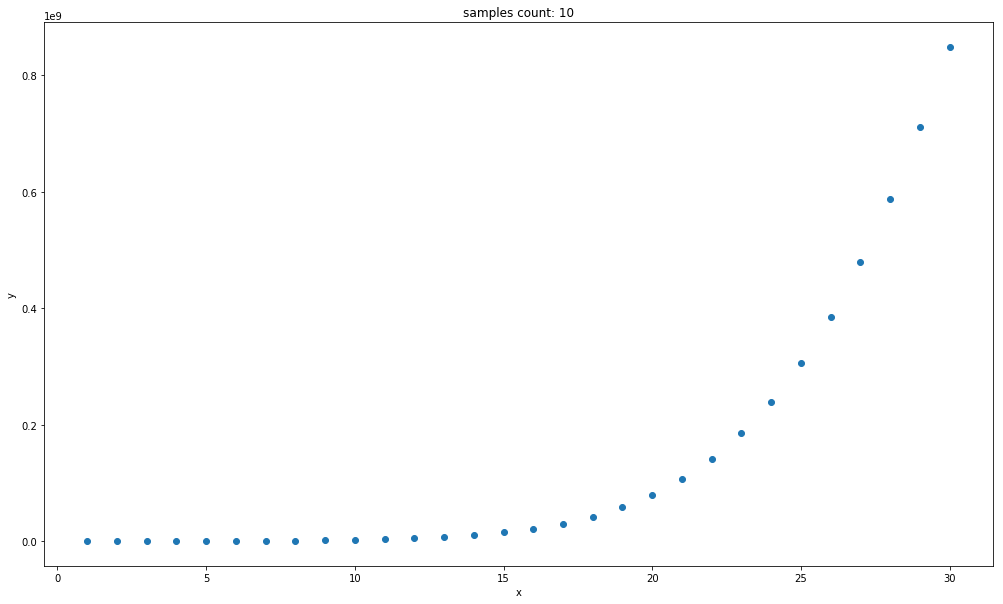

In [3]:
test_function(lambda X: np.cos(1.5 * np.pi * X), 10)

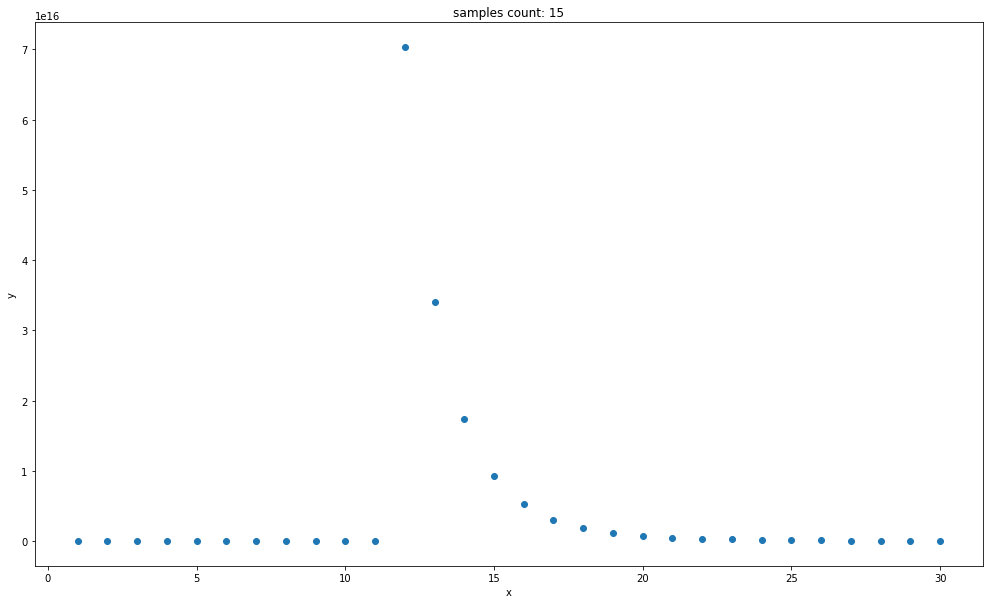

In [4]:
test_function(lambda X: np.cos(1.5 * np.pi * X), 15)

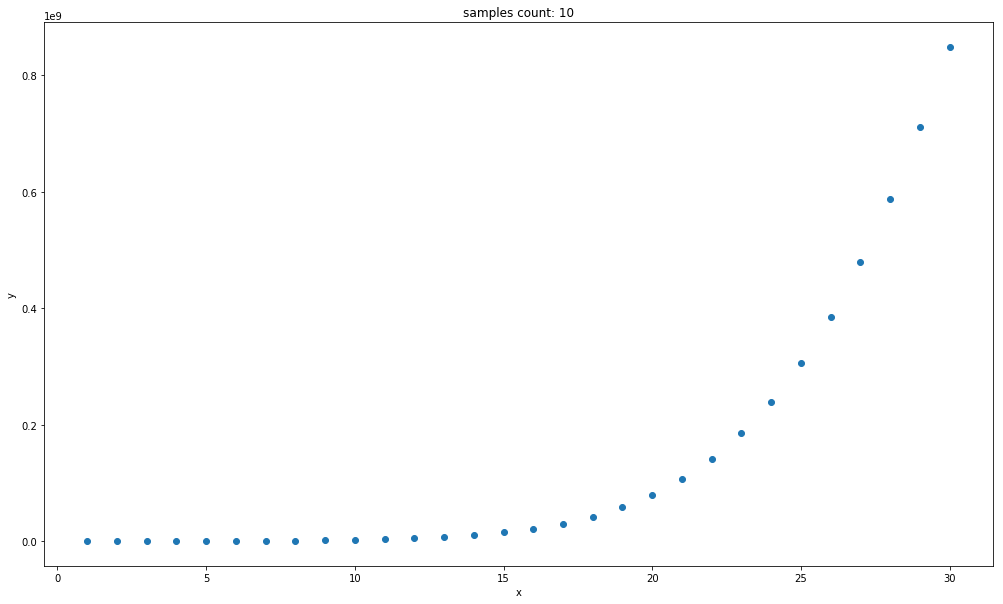

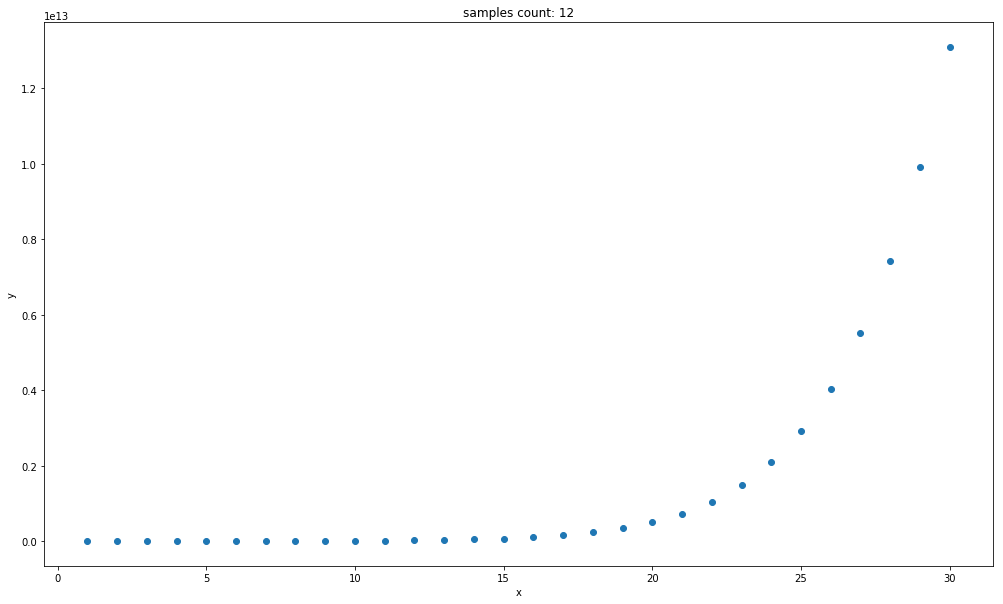

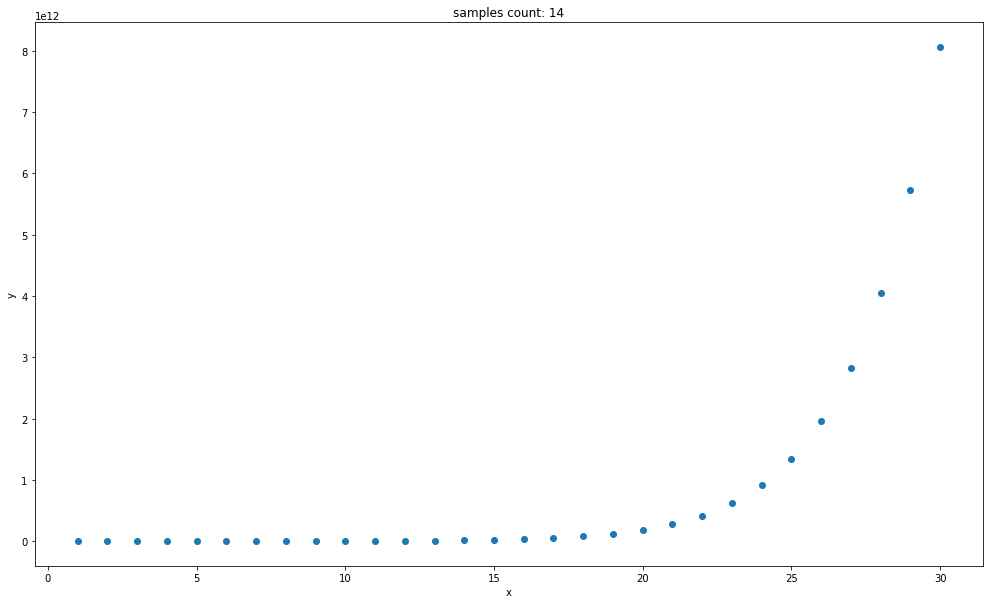

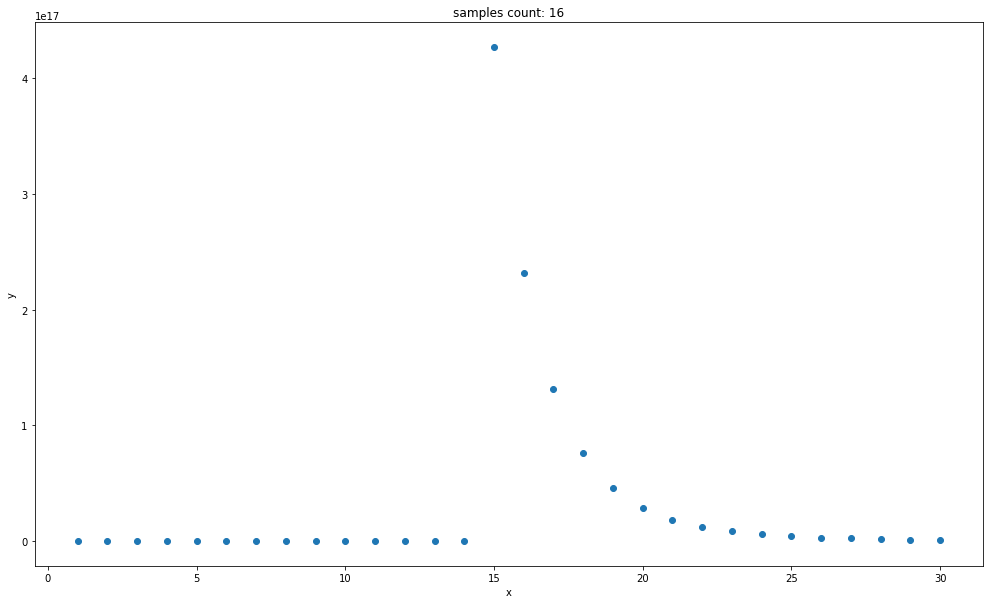

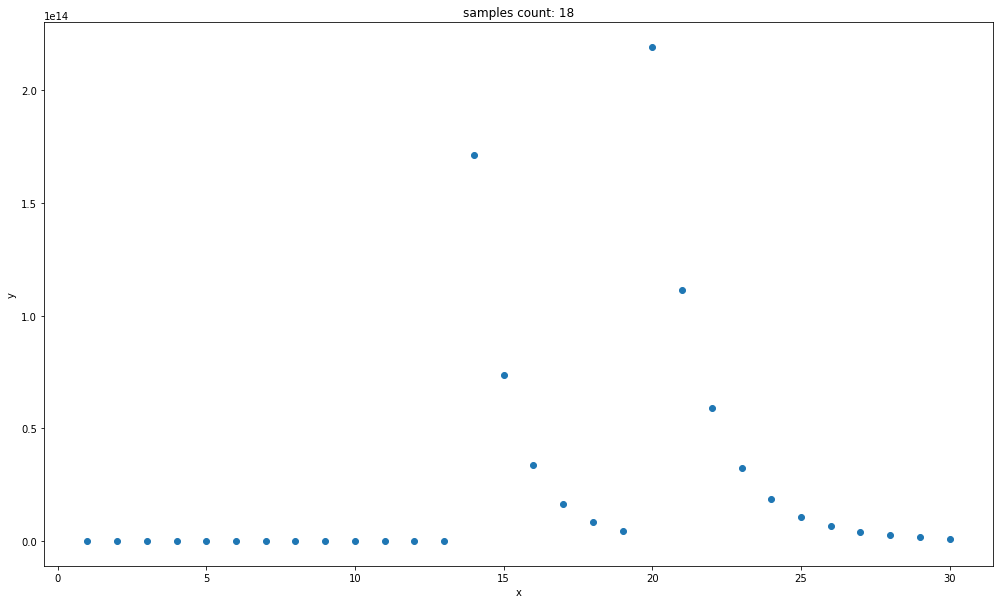

In [5]:
for i in range(10,20,2):
    test_function(lambda X: np.cos(1.5 * np.pi * X), i)

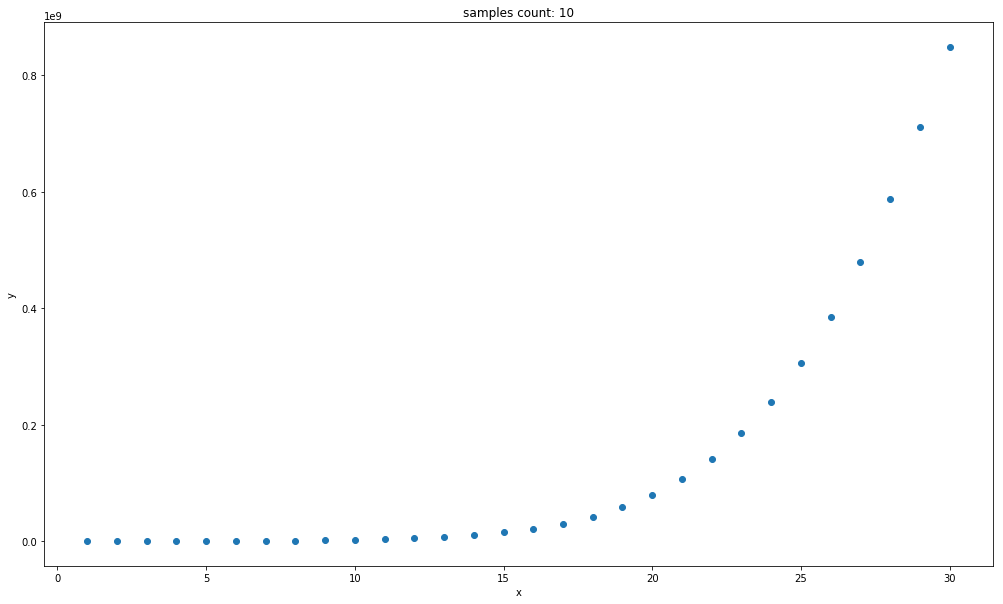

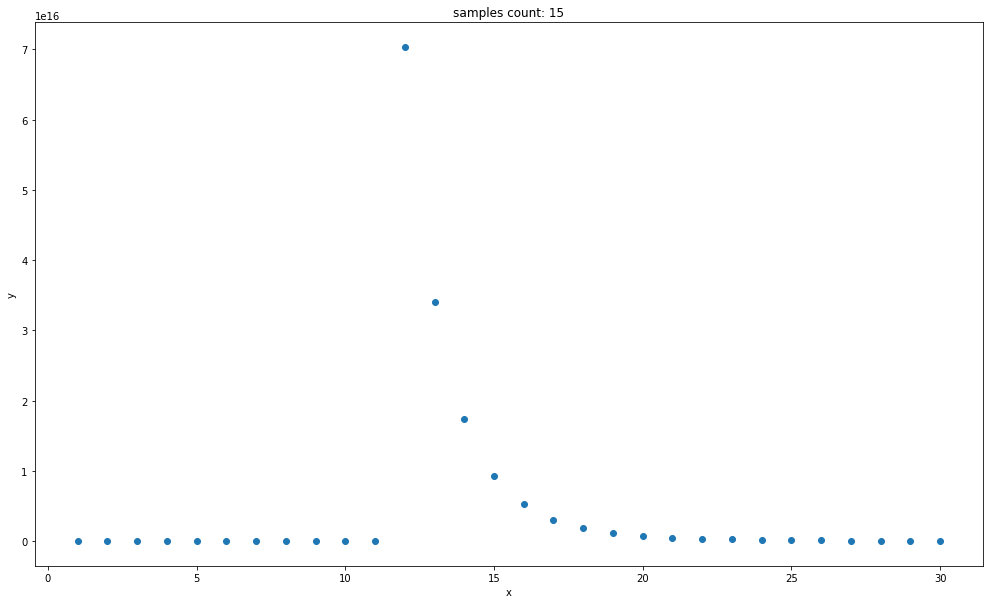

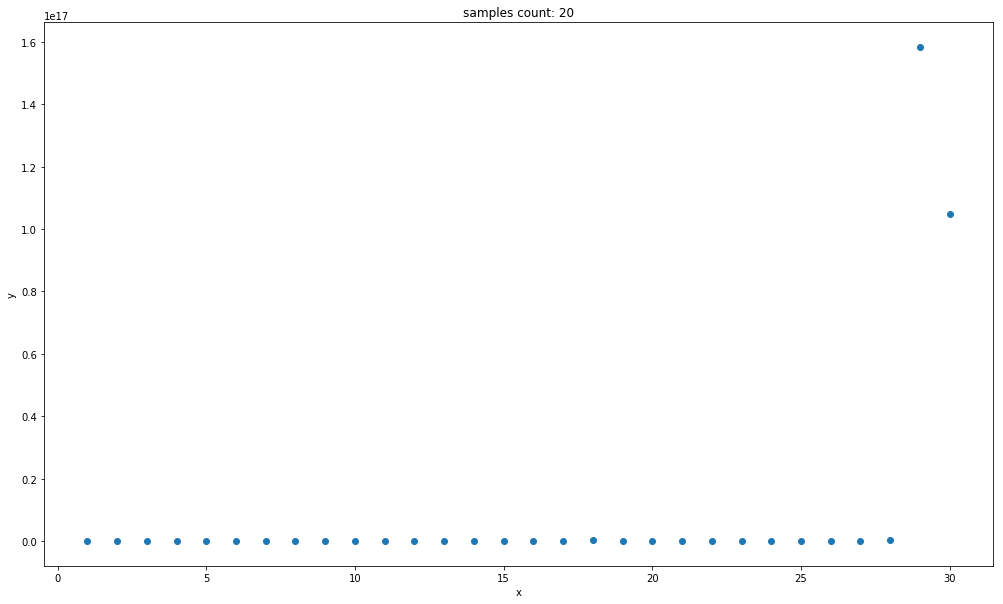

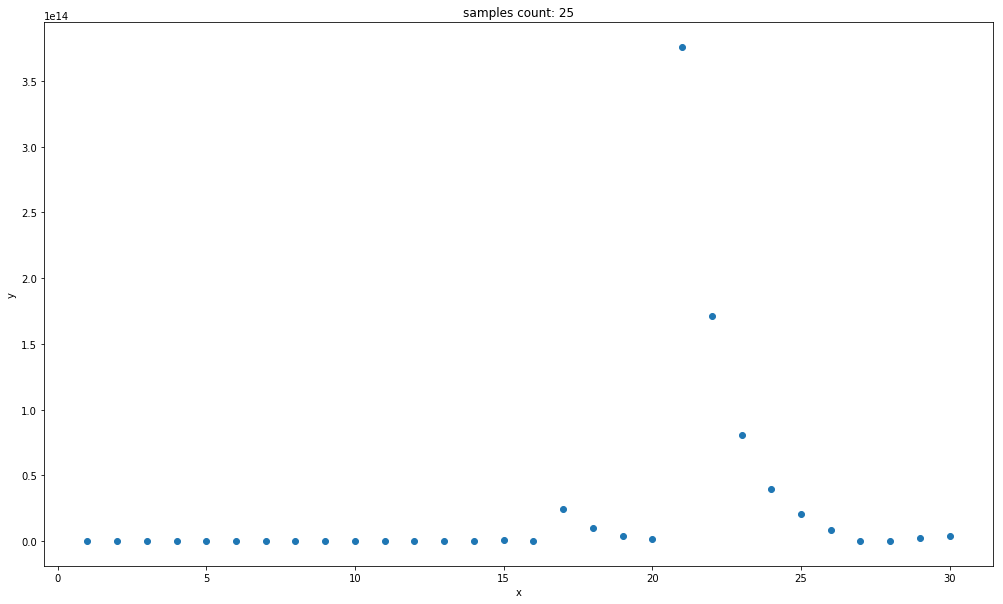

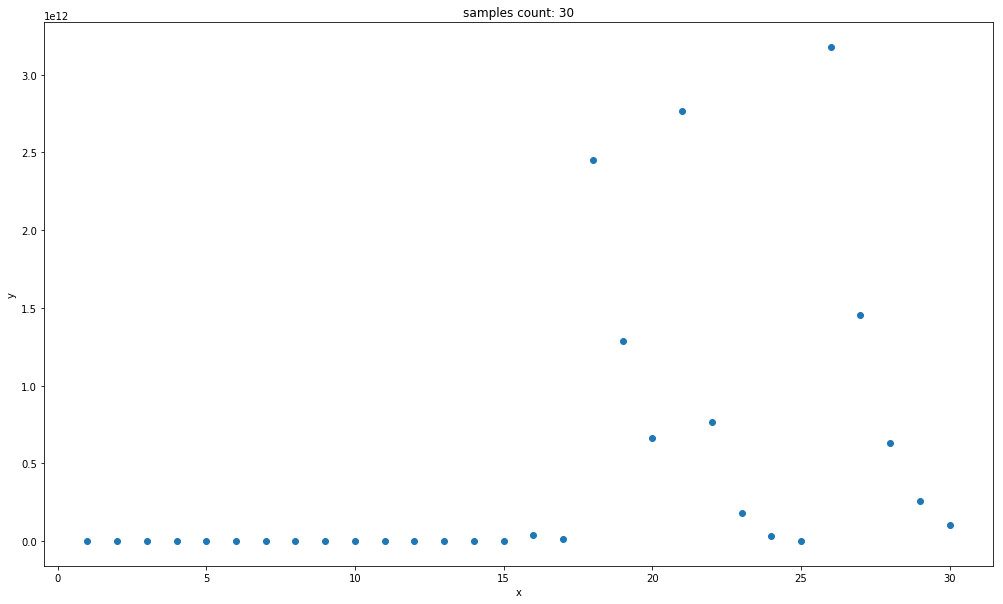

In [6]:
for i in range(10,31,5):
    test_function(lambda X: np.sin(X), i)

## Change of noise for the same function

In [7]:
def test_noise_change(func, label = "", step = 5):
    plt.figure(figsize=(17, 10))
    plt.xlabel("x")
    plt.ylabel("y")
    for i in range(10,31, step):
        test_function(func, i, False, label = label)
    plt.legend(loc="best")
    plt.show()

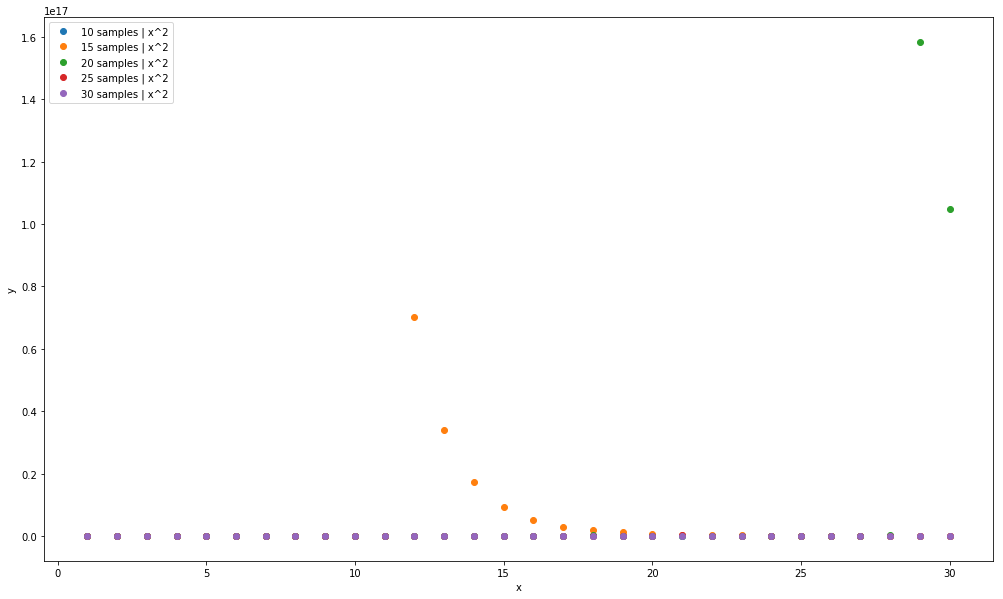

In [8]:
test_noise_change(lambda X: X**2, label = "x^2")

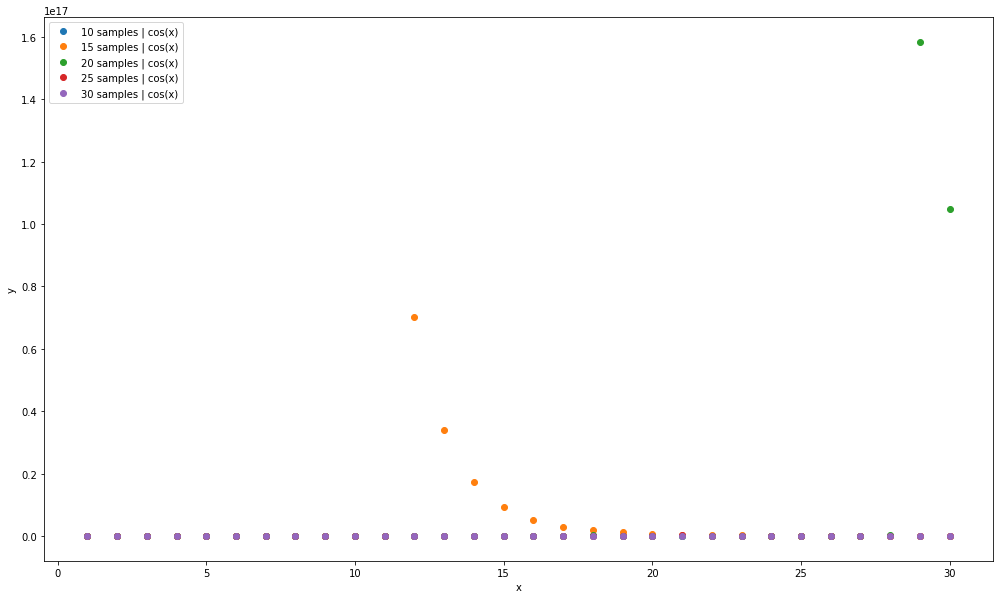

In [9]:
test_noise_change(lambda X: np.cos(X), label = "cos(x)")

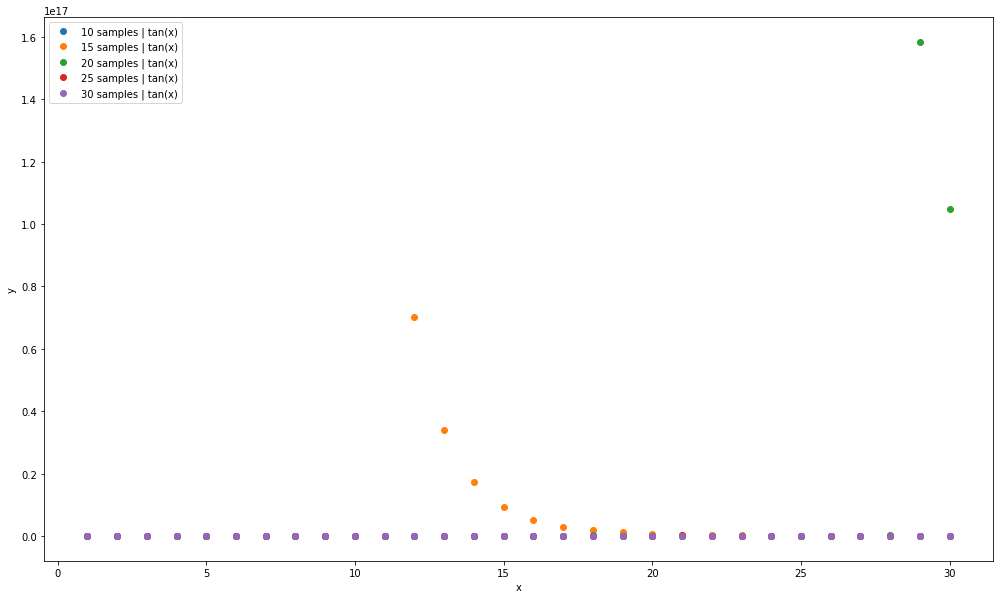

In [10]:
test_noise_change(lambda X: np.tan(X), label = "tan(x)")

## Same noise for different functions

In [11]:
def test_noise_for_functions(n_samples, funcs = []):
    plt.figure(figsize=(17, 10))
    plt.xlabel("x")
    plt.ylabel("y")
    for (func, label) in funcs:
        test_function(func, n_samples, False, label = label)
    plt.legend(loc="best")
    plt.show()

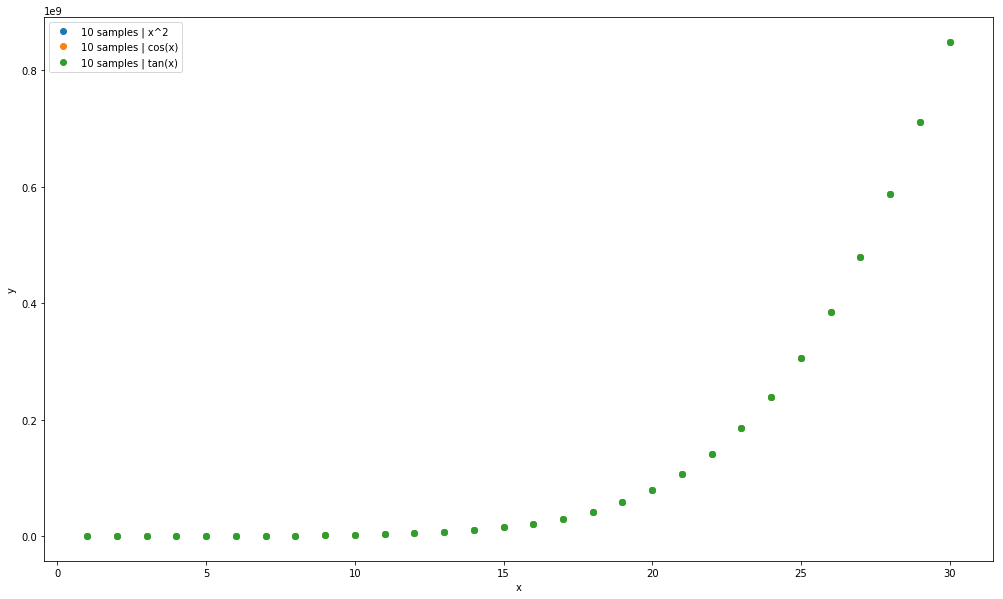

In [12]:
test_noise_for_functions(10, [(lambda X: X**2, "x^2"), (lambda X: np.cos(X), "cos(x)"), (lambda X: np.tan(X), "tan(x)")])